<a href="https://colab.research.google.com/github/xhxuciedu/CS206/blob/master/qr_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy import linalg

In [11]:
import matplotlib.pyplot as plt
from pprint import pprint
#np.set_printoptions(precision=3, suppress=False)
np.set_printoptions(precision=3, suppress=True)
#np.set_printoptions(formatter={"float_kind": lambda x: "%g" % x})

In [12]:
A = np.random.randn(5,5)

In [13]:
# make A symmetric
A = (A+A.T)/2

In [14]:
A

array([[ 0.286,  0.46 , -0.237,  0.903,  0.502],
       [ 0.46 ,  0.667, -0.252,  0.342, -0.689],
       [-0.237, -0.252,  0.824,  1.793,  0.374],
       [ 0.903,  0.342,  1.793,  0.922, -0.391],
       [ 0.502, -0.689,  0.374, -0.391,  1.975]])

## Calculate Hessenberg form of A

In [15]:
from scipy.linalg import hessenberg

In [18]:
A = np.random.randn(5,5)
H, Q = hessenberg(A, calc_q=True)
print(H)

[[ 0.735 -0.238 -0.578  0.098  0.23 ]
 [ 0.851  2.417 -0.424  0.655 -0.046]
 [ 0.     1.58   1.364 -0.658  1.726]
 [ 0.     0.    -0.101 -0.277  0.266]
 [ 0.     0.     0.    -0.038 -2.36 ]]


In [20]:
A = np.random.randn(5,5)
H, Q = hessenberg(A+A.T, calc_q=True)
print(H)

[[ 1.872  2.192 -0.     0.    -0.   ]
 [ 2.192  0.748 -1.958 -0.     0.   ]
 [ 0.    -1.958 -3.027  1.322 -0.   ]
 [ 0.     0.     1.322 -3.186 -2.678]
 [ 0.     0.     0.    -2.678 -1.375]]


## Run QR algorithm

In [31]:
# QR algorithm
A = H
for i in range(50):
  Q,R = linalg.qr(A)
  A = R.dot(Q)

In [44]:
print(A)

[[-5.706  0.    -0.    -0.     0.   ]
 [ 0.     3.812  0.011 -0.    -0.   ]
 [ 0.     0.011 -3.552  0.    -0.   ]
 [ 0.     0.    -0.     0.765 -0.   ]
 [ 0.     0.     0.    -0.    -0.286]]


In [57]:
w, v = np.linalg.eig(H)

In [58]:
print(w)

[ 3.812 -5.706 -3.552 -0.286  0.765]


In [66]:
lambda_max = w[np.argmax(np.abs(w))]
print('Largest eigenvalue: ', lambda_max)

Largest eigenvalue:  -5.706404950311452


In [29]:
print(v)

[[ 0.734 -0.047  0.168 -0.614 -0.234]
 [ 0.649  0.161 -0.416  0.604  0.118]
 [-0.195  0.479 -0.726 -0.368 -0.263]
 [-0.046 -0.733 -0.328  0.132 -0.58 ]
 [ 0.024 -0.453 -0.404 -0.325  0.725]]


In [30]:
v@v.T

array([[ 1., -0.,  0., -0., -0.],
       [-0.,  1., -0.,  0.,  0.],
       [ 0., -0.,  1., -0., -0.],
       [-0.,  0., -0.,  1.,  0.],
       [-0.,  0., -0.,  0.,  1.]])

In [67]:
# QR algorithm
A = H
loss = []
for i in range(50):
  Q,R = linalg.qr(A)
  A = R.dot(Q)
  loss.append(np.abs(A[0,0]-lambda_max))

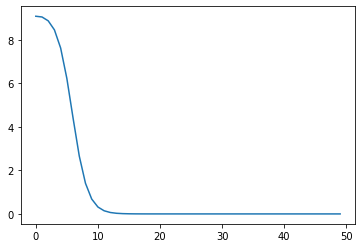

In [68]:
plt.plot(loss)